In [9]:
from nn import Layer, NN
import numpy as np
import matplotlib.pyplot as plt

*Función Lógica "XOR":* Se verifica que poniendo una capa no-lineal se tiene una correcta salida del problema.

In [2]:
l1 = Layer(2, 2, activation_function="sigmoid")
l2 = Layer(2, 1, activation_function="linear")
nn = NN([l1, l2])

x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([1, 1, -1, -1])

nn.train(x, y, epochs=2000, learning_rate=0.1)

print("Función de activación no lineal")
for xi in x:
    print(f"Entrada: {xi}, \tSalida: {round(nn.forward(xi)[0])}")

Función de activación no lineal
Entrada: [-1  1], 	Salida: 1
Entrada: [ 1 -1], 	Salida: 1
Entrada: [-1 -1], 	Salida: -1
Entrada: [1 1], 	Salida: -1


In [3]:
l1 = Layer(2, 2, activation_function="linear")
l2 = Layer(2, 1, activation_function="linear")
nn = NN([l1, l2])

x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([1, 1, -1, -1])

nn.train(x, y, epochs=2000, learning_rate=0.1)

print("Función de activación lineal")
for xi in x:
    print(f"Entrada: {xi}, \tSalida: {round(nn.forward(xi)[0])}")

Función de activación lineal
Entrada: [-1  1], 	Salida: 0
Entrada: [ 1 -1], 	Salida: 0
Entrada: [-1 -1], 	Salida: 0
Entrada: [1 1], 	Salida: 0


*Discriminación de paridad:* Particularmente este ejercicio presenta una región de separación de clases $\{Par, Impar\}$ que es periodica, lo cual utilizar una función del tipo no lineal aperiodica no permitirá generalizar correctamente.

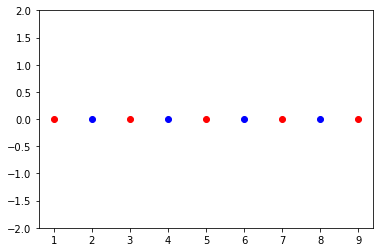

In [60]:
x = np.array([xi for xi in range(10)])
y = x.reshape(-1) % 2

for pts in zip(x, y):
    plt.scatter(pts[0], 0, color="red" if pts[-1] == 1 else "blue")

plt.ylim(-2, 2)
plt.show()

Una posible idea puede ser utilizar una función periodica, como la función $y = cos(w\cdot x)$.
De un analisis simple para conjunto de numeros enteros, podemos encontrar que con $w = (2k+1)\pi$ se obtiene una correcta separación del espacio solución.

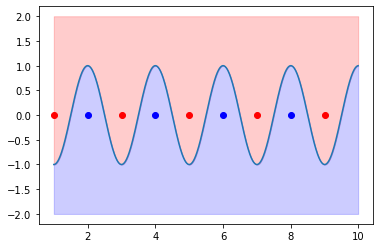

In [58]:
x = np.array([xi for xi in range(10)])
y = x.reshape(-1) % 2

for pts in zip(x, y):
    plt.scatter(pts[0], 0, color="red" if pts[-1] == 1 else "blue")

x_range = np.arange(1, 10, 0.01)

k = 0
w = (2*k + 1) * np.pi
cos_x = np.cos(w * x_range)

plt.fill_between(x_range, cos_x,  2, alpha=0.2, color="red")
plt.fill_between(x_range, cos_x, -2, alpha=0.2, color="blue")
plt.plot(x_range, cos_x)
plt.show()

Para este caso la estructura de la red es tan simple como una capa de perceptron no-lineal con una función cosenoidal y la capa de salida una función logistica para tener los valores entre $0: Par, 1: Impar$

In [61]:
l1 = Layer(1, 1, activation_function="cosine")
l2 = Layer(1, 1, activation_function="sigmoid")
nn = NN([l1, l2])

x = np.array([[xi] for xi in range(10)])
y = x.reshape(-1) % 2

# Inicializamos los pesos con valores no aleatorios
k = 0
w = (2*k + 1) * np.pi
l1.w = np.array([[w]])
 
nn.train(x, y, epochs=2000, learning_rate=0.01)

for xi in x:
    print(f"Entrada: {xi}, \tSalida: {round(nn.forward(xi)[0])}")

Entrada: [0], 	Salida: 0
Entrada: [1], 	Salida: 1
Entrada: [2], 	Salida: 0
Entrada: [3], 	Salida: 1
Entrada: [4], 	Salida: 0
Entrada: [5], 	Salida: 1
Entrada: [6], 	Salida: 0
Entrada: [7], 	Salida: 1
Entrada: [8], 	Salida: 0
Entrada: [9], 	Salida: 1


Otra opción es prepocesar los datos de otra manera, quizas representar el numero como un vector que sea su representación en base 2 sería una conveniente representación de la información. La gracia de esto es que el ultimo bit será 0 o 1 y se podrá determinar facilmente la paridad con ese valor.

In [95]:
x = np.array([[xi] for xi in range(10)])
y = x.reshape(-1) % 2

x_transformed = []
vector_size = x.max() // 2
to_base2_vector = lambda x: [int(d) for d in np.base_repr(x, base=2).zfill(vector_size)]

x_transformed = np.array([to_base2_vector(xi[0]) for xi in x])
y_transformed = y

l1 = Layer(vector_size, 1, activation_function="linear")
nn = NN([l1])

nn.train(x_transformed, y_transformed, epochs=2000, learning_rate=0.1)

for xi in x:
    print(f"Entrada: {xi}, \tSalida: {np.round(nn.forward(to_base2_vector(xi[0])))}")

Entrada: [0], 	Salida: [-0.]
Entrada: [1], 	Salida: [1.]
Entrada: [2], 	Salida: [-0.]
Entrada: [3], 	Salida: [1.]
Entrada: [4], 	Salida: [-0.]
Entrada: [5], 	Salida: [1.]
Entrada: [6], 	Salida: [-0.]
Entrada: [7], 	Salida: [1.]
Entrada: [8], 	Salida: [-0.]
Entrada: [9], 	Salida: [1.]


Notesé que el problema ahora es facilmente separable con un plano.

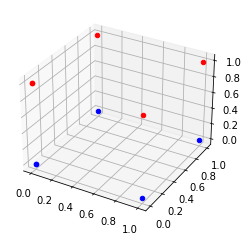

In [93]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xi in x_transformed:
    ax.scatter(xi[1], xi[2], xi[3], color="red" if xi[-1] == 1 else "blue")

# Conclusiones

Como principales conclusiones de este trabajo arribamos a que:

* El perceptrón no lineal demuestra su capacidad para resolver problemas no linealmente separables, como el caso clásico del XOR, algo que el perceptrón lineal no puede lograr.

* La elección adecuada de la función de activación es crucial para capturar la no linealidad presente en problemas como XOR y paridad.

* Es importante contar con una idea clara del problema a resolver para poder elegir adecuadamente la representación de la información de entrada.

* El tratamiento previo de los datos es fundamental para lograr una representación útil y efectiva que facilite el aprendizaje del modelo.

> No se realiza la discriminación de dígito ya que es analizado en el ejercicio 4